In [1]:
import numpy as np
import modules_solar as mds
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# Read the data from Ricardo in order to get initial conditions in order to evolv the system

In [2]:
data = np.loadtxt('orbit_evolution.log', skiprows = 1).T

out = {}
out['fail'] = False

#Make the table reading automatic
out['t'     ] = data[0, :]
out['xstar' ] = np.array([ data[ 1, :], data[ 2, :], data[ 3, :] ]).T
out['vstar' ] = np.array([ data[ 4, :], data[ 5, :], data[ 6, :] ]).T
out['xBH'   ] = np.array([ data[ 7, :], data[ 8, :], data[ 9, :] ]).T
out['vBH'   ] = np.array([ data[10, :], data[11, :], data[12, :] ]).T
out['xFrame'] = np.array([ data[13, :], data[14, :], data[15, :] ]).T
out['vFrame'] = np.array([ data[16, :], data[17, :], data[18, :] ]).T
out['aFrame'] = np.array([ data[19, :], data[20, :], data[21, :] ]).T

#Switch from local frame to global frame
out['xstarglobal'] = out['xstar'] + out['xFrame']
out['vstarglobal'] = out['vstar'] + out['vFrame']

#Compute acceleration of the center of mass
accx = np.gradient(out['vstar'][:, 0], out['t'], edge_order = 2)
accy = np.gradient(out['vstar'][:, 1], out['t'], edge_order = 2)
accz = np.gradient(out['vstar'][:, 2], out['t'], edge_order = 2)

out['astar'] = np.array([ accx, accy, accz ]).T
out['astarglobal'] = out['astar'] + out['aFrame']

No handles with labels found to put in legend.


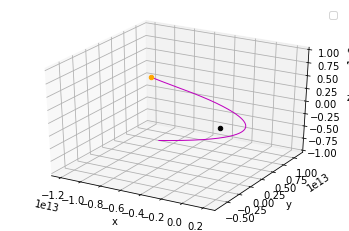

In [29]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(out['xBH'].T[0], out['xBH'].T[1], out['xBH'].T[2], 'c', linewidth=1)# Plot the BH orbit
ax.plot(out['xstarglobal'].T[0], out['xstarglobal'].T[1], out['xstarglobal'].T[2], 'm', linewidth=1)# Plot the star orbit
ax.scatter3D(out['xBH'].T[0][-1], out['xBH'].T[1][-1], out['xBH'].T[2][-1], 'o', c='black') #s=100
ax.scatter3D(out['xstarglobal'].T[0][-1], out['xstarglobal'].T[1][-1], out['xstarglobal'].T[2][-1], '0', c='orange') #s=10
ax.legend()
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
#ax.set_xlim3d(-1,1)
#ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1000000,1000000)
#ax.set_xlim3d(min(min(posbh1x), min(posbh2x)), max(max(posbh1x), max(posbh2x)))
#ax.set_ylim3d(min(min(posbh1y), min(posbh2y)), max(max(posbh1y), max(posbh2y)))
#ax.set_zlim3d(min(min(posbh1z), min(posbh2z)), max(max(posbh1z), max(posbh2z)))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


#plt.savefig('ne-circular2rt-5orbits.eps',bbox_inches='tight')#, dpi=300

plt.show()

# Convert CGS Units to Natural Units 

In [3]:
#------------------------------------------------------------------------------------------
#Units and conversions:
#------------------------------------------------------------------------------------------
#code units: Rsun, Msun, G=1, ...
c_SI       = 299792458.0        #m/s
M_sun_SI   = 1.989*(10.**30.)   #kg
R_sun_SI   = 695800000.         #m
#R_bull_SI = 1000 #m 
AU_SI      = 149597871000.      #m 
G_new_SI   = 6.67*(10.**(-11.)) #m**3 kg**(-1) s**(-2)
AU_U       = AU_SI/R_sun_SI                             #from dist AU to code units (U)
kmsec_U    = 1000./np.sqrt(G_new_SI*M_sun_SI/R_sun_SI)  #from vel km/sec to code units (U)
acckmsec_U = 1000./np.sqrt((G_new_SI**2)*(M_sun_SI**2)/(R_sun_SI**4))  #from acc km/sec^2 to code Units
time_U     = 1/np.sqrt(G_new_SI*M_sun_SI/R_sun_SI**3) #from CU to second np.sqrt((R_bull_SI)/(G_new_SI*M_sun_SI)) #from code units(U) to time sec
#Rsch_1Msun_unitRsun = ((2.*G_new_SI*(1.*M_sun_SI))/(c_SI**2.))/R_sun_SI
c_CU = c_SI/1000*kmsec_U

In [4]:
outcu = {}
outcu = {}
outcu['fail'] = False

#Make the table reading automatic
outcu['t'     ] = data[0, :]/time_U
outcu['xstar' ] = np.array([ data[ 1, :], data[ 2, :], data[ 3, :] ]).T/(100000*696340)
outcu['vstar' ] = np.array([ data[ 4, :], data[ 5, :], data[ 6, :] ]).T*kmsec_U/100000
outcu['xBH'   ] = np.array([ data[ 7, :],
                            data[ 8, :], data[ 9, :] ]).T/(100000*696340)
outcu['vBH'   ] = np.array([ data[10, :], data[11, :], data[12, :] ]).T*kmsec_U/100000
outcu['xFrame'] = np.array([ data[13, :], data[14, :], data[15, :] ]).T/(100000*696340)
outcu['vFrame'] = np.array([ data[16, :], data[17, :], data[18, :] ]).T*kmsec_U/ 100000
outcu['aFrame'] = np.array([ data[19, :], data[20, :], data[21, :] ]).T*acckmsec_U/100000 #Need to convert this to correct units

#Switch from local frame to global frame
outcu['xstarglobal'] = outcu['xstar'] + outcu['xFrame']
outcu['vstarglobal'] = outcu['vstar'] + outcu['vFrame']

#Compute acceleration of the center of mass
accxcu = np.gradient(outcu['vstar'][:, 0], outcu['t'], edge_order = 2)
accycu = np.gradient(outcu['vstar'][:, 1], outcu['t'], edge_order = 2)
acczcu = np.gradient(outcu['vstar'][:, 2], outcu['t'], edge_order = 2)

outcu['astar'] = np.array([ accxcu, accycu, acczcu ]).T*acckmsec_U/100000
outcu['astarglobal'] = outcu['astar'] + outcu['aFrame']

In [5]:
outcu['astarglobal']

array([[ 4.00270367e-02,  9.17134628e-02, -5.77151876e-16],
       [ 4.00285907e-02,  9.17297451e-02, -2.00367403e-16],
       [ 4.00301439e-02,  9.17460316e-02, -1.05807061e-17],
       ...,
       [ 1.38287735e-02, -1.25369203e-02, -4.94152909e-16],
       [ 1.38283554e-02, -1.25363632e-02, -4.93037386e-16],
       [ 1.38279378e-02, -1.25358068e-02, -4.90300101e-16]])

## Run a simulation for each time step to obtain the Newtonian acceleration 

### Newtonian 

In [10]:
#Acceleration

def acc(r,m): #r position, m mass
    a = np.zeros((len(r),3)) #Create acceleration vector
    for i in range(len(r)): #Range is size of timesteps or position steps
        for j in range(len(r)): #For each particle
            if (i != j):
                rrel = r[i]-r[j]
                rn = (rrel**2).sum()**(1./2) 
                a[i] += -(rrel)*m[j]/(rn**3.0) #Acceleration at each time step 
    return a # return acceleration


def Jerk(r,v,m): #position, velocity, mass
    Je = np.zeros((len(r),3)) #Define the Jerk
    for i in range(len(r)):
        for j in range(len(r)):
            if (i != j):
                rrel = r[i]-r[j]
                vrel = v[i]-v[j]
                rn = (rrel**2).sum()**(1./2) # dot product
                vn = (vrel**2).sum()**(1./2)
                rvd = ((rrel)*(vrel)).sum()
                Je[i] += - m[j]*((vrel)/rn**3.0 - 3.*(rvd*rrel/(rn**5.0))) 
    return Je;

def HermiteUpdateN(dt, r, v, m): 
    a = acc(r, m)          # current acceleration
    adot = Jerk(r,v,m)     # current jerks
    rp = r + dt*v + dt**2/2 * a + dt**3/6* adot   # predict
    vp = v + dt*a + dt**2/2 * adot
    ap = acc(rp,m)          # predicted acceleration
    adotp = Jerk(rp,vp,m)  # predicted jerks 
    vc = v + dt/2*(a+ap) - dt**2/12*(adotp-adot)  # correct
    rc = r + dt/2*(v + vp) - dt**2/12 *(ap-a) 
    ac = a + dt/2*(adot + adotp)
    
    return ac

## Change shape to position and vel vectors from hydro sim to run sim 

In [11]:
rhydro = np.array([outcu['xBH'].T , outcu['xstarglobal'].T])
print(np.shape(rhydro))
vhydro = np.array([outcu['vBH'].T ,outcu['vstarglobal'].T])
print(np.shape(vhydro))



(2, 3, 58050)
(2, 3, 58050)


In [14]:
outcu['t']

array([0.00000000e+00, 2.07368612e-03, 4.14735137e-03, ...,
       8.15791421e+01, 8.15806875e+01, 8.15822314e+01])

In [180]:
#Define the bh
bh = mds.Particle("BH", 1000, 0,0) #stellar type, mass, radius, spin

#Define the star
star = mds.Particle("WD",1,1,0)

N=2
massv = np.ones(N)#/N #Remove the N if not necessary
massv[0]=bh.mass
massv[1]=star.mass

aNhydro = np.zeros((2,3,(len(outcu['t'])-1)))

dtcu = np.zeros(len(outcu['t'])-1)

for i in range(1,len(outcu['t'])):
    dtcu[i-1] = outcu['t'][i] - outcu['t'][i-1]


for i in range(1,len(outcu['t'])):
    (aNhydro[:,:,i-1]) = HermiteUpdateN(dtcu[i-1], rhydro[:,:,i-1], vhydro[:,:,i-1], massv)

In [181]:
print(np.shape(aNhydro[1]))

(3, 58049)


In [182]:
print(aNhydro[1].T)

[[ 4.00751857e-02  9.18365325e-02  1.00551629e-17]
 [ 4.00767408e-02  9.18528380e-02  1.01397434e-14]
 [ 4.00782951e-02  9.18691475e-02  2.01027065e-14]
 ...
 [ 1.38457228e-02 -1.25507560e-02 -1.06737422e-11]
 [ 1.38453043e-02 -1.25501983e-02 -1.06767171e-11]
 [ 1.38448862e-02 -1.25496412e-02 -1.06796997e-11]]


In [183]:
#Give shape to the acceleration from the hydrosimulation and match the coefficient

print(np.shape(outcu['astarglobal'].T))

(3, 58050)


In [184]:
print(np.shape(outcu['astarglobal'][0]))

(3,)


In [185]:
outcu['astarglobal'][2]

array([ 4.00301439e-02,  9.17460316e-02, -1.05807061e-17])

In [186]:
print(np.shape(aNhydro[1].T[3]))

(3,)


In [187]:
aratio = np.zeros_like(outcu['astarglobal']-1)
for i in range(len(outcu['astarglobal'])-2):
    aratio[i+1][0] = (outcu['astarglobal'][i+1][0])/(aNhydro[1].T[i+1][0])
    aratio[i+1][1] = (outcu['astarglobal'][i+1][1])/(aNhydro[1].T[i+1][1])


In [188]:
print(aratio)

[[0.         0.         0.        ]
 [0.99879855 0.99865989 0.        ]
 [0.99879857 0.99865988 0.        ]
 ...
 [0.99880603 0.99894201 0.        ]
 [0.998806   0.99894196 0.        ]
 [0.         0.         0.        ]]


In [189]:
print(np.shape(aratio))

(58050, 3)


In [190]:
print(aratio.T)

[[0.         0.99879855 0.99879857 ... 0.99880603 0.998806   0.        ]
 [0.         0.99865989 0.99865988 ... 0.99894201 0.99894196 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [191]:
#define relative position
relpos = rhydro[1].T - rhydro[0].T 
#define relative velocity
relvel = vhydro[1].T - vhydro[0].T

normrelpos = np.zeros([len(relpos), 1]) 
for i in range(len(normrelpos)):
    normrelpos[i] = np.sqrt(relpos[i][0]**2 + relpos[i][1]**2 + relpos[i][2]**2)

print(len(normrelpos.T[0]))
print(min(normrelpos))
print(max(normrelpos))

58050
[29.97223213]
[231.33396675]


In [192]:
n_ex = (normrelpos.T[0]**5)*(1./9)*(1.*star.mass/bh.mass)*(aratio.T[0] - 1) 
n_ey = (normrelpos.T[0]**5)*(1./9)*(1.*star.mass/bh.mass)*(aratio.T[1] - 1)

No handles with labels found to put in legend.


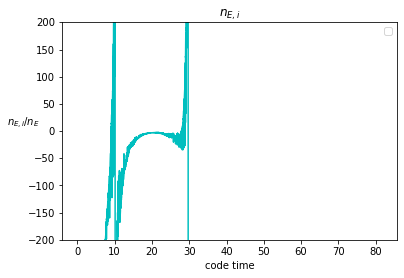

In [197]:
plt.plot(outcu['t'][1:-1], n_ex[1:-1], 'c-', alpha = 1)
#plt.plot(timearrayN.T[0][2:], n_ey[1:], 'b-', label = r'$n_{Ey}$', alpha = 0.5)
#plt.plot(timearrayT[1:], posydif, 'b-', label = r'$\Delta y$', alpha = 0.8)

#plt.plot(timeave, dynstave.T[1], 'b-', label = r'$star$', alpha = 0.8)
#plt.plot(time[1:], n_e.T[2], 'g-', label = r'$n_{ez}$', alpha = 0.8)
#plt.xlim(0,30)
plt.ylim(-200,200)
plt.xlabel('code time')
plt.ylabel(r'$n_{E,i}/n_E$',rotation=0)

plt.title(r'$n_{E,i}$ ')
plt.legend()
#plt.savefig('ne-evolution-circular-0.001-4rs-5orbits.eps', bbox_inches='tight')#, dpi=300

plt.show()

No handles with labels found to put in legend.


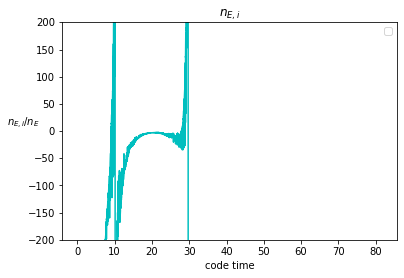

In [196]:
plt.plot(outcu['t'][1:-1], n_ex[1:-1], 'c-', alpha = 1)
#plt.plot(timearrayN.T[0][2:], n_ey[1:], 'b-', label = r'$n_{Ey}$', alpha = 0.5)
#plt.plot(timearrayT[1:], posydif, 'b-', label = r'$\Delta y$', alpha = 0.8)

#plt.plot(timeave, dynstave.T[1], 'b-', label = r'$star$', alpha = 0.8)
#plt.plot(time[1:], n_e.T[2], 'g-', label = r'$n_{ez}$', alpha = 0.8)
#plt.xlim(0,30)
plt.ylim(-200,200)
plt.xlabel('code time')
plt.ylabel(r'$n_{E,i}/n_E$',rotation=0)

plt.title(r'$n_{E,i}$ ')
plt.legend()
#plt.savefig('ne-evolution-circular-0.001-4rs-5orbits.eps', bbox_inches='tight')#, dpi=300

plt.show()

No handles with labels found to put in legend.


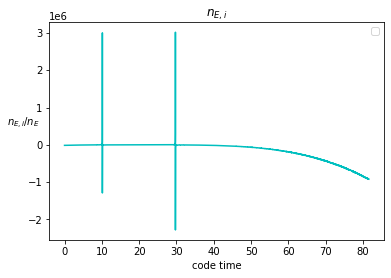

In [194]:
plt.plot(outcu['t'][1:-10], n_ex[1:-10]/star.ntide, 'c-', alpha = 1)
#plt.plot(timearrayN.T[0][2:], n_ey[1:], 'b-', label = r'$n_{Ey}$', alpha = 0.5)
#plt.plot(timearrayT[1:], posydif, 'b-', label = r'$\Delta y$', alpha = 0.8)

#plt.plot(timeave, dynstave.T[1], 'b-', label = r'$star$', alpha = 0.8)
#plt.plot(time[1:], n_e.T[2], 'g-', label = r'$n_{ez}$', alpha = 0.8)
#plt.xlim(0,30)
#\plt.ylim(-1000,1000)
plt.xlabel('code time')
plt.ylabel(r'$n_{E,i}/n_E$',rotation=0)

plt.title(r'$n_{E,i}$ ')
plt.legend()
#plt.savefig('ne-evolution-circular-0.001-4rs-5orbits.eps', bbox_inches='tight')#, dpi=300

plt.show()

# Running a simulation with EFTs

### Add tides 

In [121]:
def acctide(r,m,ne): #r position, m mass, s spin, m mass of the star and the value of ne
    a = np.zeros((len(r),3)) #Create acceleration vector
    for i in range(len(r)): #Range is size of timesteps or position steps
        for j in range(len(r)): #For each particle
            if (i != j):
                rrel = r[i]-r[j]
                rn = ((rrel**2).sum())**(1./2) #dot product
                runi = rrel/rn
                a[i] += -(9.)*ne[i]*((m[j]**2)/m[i])*(runi)/(rn**7.0) #Acceleration at each time step 
    return a # return acceleration

def Jerktide(r,v,m, ne): #r position, v velocity, m mass, m mass of the star, ne
    Je = np.zeros((len(r),3)) #Define the Jerk
    for i in range(len(r)):
        for j in range(len(r)):
            if (i != j):
                rrel = (r[i]-r[j])
                vrel = (v[i]-v[j])
                rn = ((rrel**2).sum())**(1./2) # dot product
                Je[i] += - (9.0)*ne[i]*((m[j]**2)/m[i])*( vrel/rn**8.0 - 8.*((vrel*rrel).sum())*(rrel)/(rn**10.0) ) 
    return Je;


def HermiteUpdatetidedt(dt, r, v, m, ns): # m mass of the star
    
    aN = acc(r, m) 
    aT = acctide(r, m, ns)
    a = aN + aT           # current acceleration
    aNdot = Jerk(r,v,m)
    aTdot = Jerktide(r, v, m, ns)
    adot = aNdot + aTdot # current jerks
    rp = r + dt*v + dt**2/2 * a + dt**3/6* adot   # predict
    vp = v + dt*a + dt**2/2 * adot

    aNp = acc(rp, m)
    aTp = acctide(rp, m, ns)
    ap = aNp + aTp         # predicted acceleration

    aNdotp = Jerk(rp, vp, m)
    aTdotp = Jerktide(rp, vp, m, ns)
    adotp = aNdotp + aTdotp  # predicted jerks 
    
    dtp = dt
    
    vc = v + dt/2*(a+ap) - dt**2/12*(adotp-adot)  # correct
    rc = r + dt/2*(v + vp) - dt**2/12 * (ap-a)
    ac = a + dt/2*(adotp + adot)
    aNc = aN + dt/2*(aNdotp + aNdot)
 
    return rc,vc,ac,aNc,dtp

def Hermite4thtidedt(pri,sec, bina, nsteps, Dt):
    
    N=2
    m = np.ones(N)#/N #Remove the N if not necessary
    m[0]=pri.mass
    m[1]=sec.mass
    
    r_res = np.zeros((2,3,nsteps)) # 2 because of two bodies
    v_res = np.zeros((2,3,nsteps))

    aN_res = np.zeros((2,3,nsteps)) # 2 because of two bodies
    #adotN_res = np.zeros((2,3,nsteps))

    a_res = np.zeros((2,3,nsteps)) # 2 because of two bodies
    #adot_res = np.zeros((2,3,nsteps))

    
    time = np.zeros(nsteps)
    r_res[:,:,0] = bina.r.copy()
    v_res[:,:,0] = bina.v.copy()
    ntidev = np.array([pri.ntide, sec.ntide])
    
    dtp = np.zeros(nsteps)
    dtp[0] = Dt[0]
    
    for i in range(1,nsteps):
        (r_res[:,:,i],v_res[:,:,i],a_res[:,:,i],aN_res[:,:,i], dtp[i]) = HermiteUpdatetidedt(Dt[i-1], r_res[:,:,i-1], v_res[:,:,i-1], m, ntidev)
        time[i] = time[i-1] + Dt[i-1]#
        #if time[i] >= timelimit:
        #    break
            
    r_res = r_res[:,:,:i]
    v_res = v_res[:,:,:i]
    a_res = a_res[:,:,:i]
    #adot_res = adot_res[:,:,:i]
    aN_res = aN_res[:,:,:i]
    #adotN_res = adotN_res[:,:,:i]
    dtp = dtp[:i]
    time = time[:i]
        
    return r_res, v_res, a_res, aN_res, dtp, time


In [157]:
#Define a binary  with an arbitraty distance
bhstarparab = mds.Binary(bh,star, 100*star.radi,0) #Particle1, Particle2, distance, ecc. 


#Define initial position as in Ricardo's simulation #Start at initial position sbhsr[1000]
bhstarparab.r[0] = rhydro[0].T[0]
bhstarparab.r[1] = rhydro[1].T[0]
#Define initial velocity 
bhstarparab.v[0] = vhydro[0].T[0]
bhstarparab.v[1] = vhydro[1].T[0]

In [158]:
print(bhstarparab.r[0])
print(bhstarparab.r[1])

[0.03992331 0.0914758  0.        ]
[-3.99233130e+01 -9.14758020e+01 -1.00251257e-14]


In [159]:
print(bhstarparab.v[0])
print(bhstarparab.v[1])

[-0.00374078 -0.00244892  0.        ]
[3.7407828  2.44891719 0.        ]


In [160]:
#Run the EFT simulation

In [161]:
Nsteps = len(outcu['t'])

In [162]:
r,v,aT,aN,dtp,time = Hermite4thtidedt(bh,star, bhstarparab, Nsteps, dtcu)

No handles with labels found to put in legend.


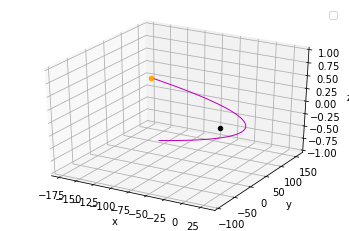

In [163]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(r[0][0], r[0][1], r[0][2], 'c', linewidth=1)# Plot the BH orbit
ax.plot(r[1][0], r[1][1], r[1][2], 'm', linewidth=1)# Plot the star orbit
ax.scatter3D(r[0][0][-1], r[0][1][-1], r[0][2][-1], 'o', c='black') #s=100
ax.scatter3D(r[1][0][-1], r[1][1][-1], r[1][2][-1], '0', c='orange') #s=10
ax.legend()
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
#ax.set_xlim3d(-1,1)
#ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
#ax.set_xlim3d(min(min(posbh1x), min(posbh2x)), max(max(posbh1x), max(posbh2x)))
#ax.set_ylim3d(min(min(posbh1y), min(posbh2y)), max(max(posbh1y), max(posbh2y)))
#ax.set_zlim3d(min(min(posbh1z), min(posbh2z)), max(max(posbh1z), max(posbh2z)))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


#plt.savefig('ne-circular2rt-5orbits.eps',bbox_inches='tight')#, dpi=300

plt.show()

In [164]:
aratio = np.zeros_like(aN[1].T)
for i in range(len(aN[1].T)-1):
    aratio[i+1][0] = (aT[1].T[i+1][0])/(aN[1].T[i+1][0])
    aratio[i+1][1] = (aT[1].T[i+1][1])/(aN[1].T[i+1][1])
    #print(aratio[i][1])
    
#define relative position
relpos = r[1].T - r[0].T 
#define relative velocity
relvel = v[1].T - v[0].T

normrelpos = np.zeros([len(relpos), 1]) 
normrelvel = np.zeros([len(relvel), 1]) 

for i in range(len(normrelpos)):
    normrelpos[i] = np.sqrt(relpos[i][0]**2 + relpos[i][1]**2 + relpos[i][2]**2)
    normrelvel[i] = np.sqrt(relvel[i][0]**2 + relvel[i][1]**2 + relvel[i][2]**2)
    
print(len(normrelpos.T[0]))
print(min(normrelpos))
print(max(normrelpos))

58049
[29.96411839]
[231.4919065]


In [165]:
n_ex = (normrelpos.T[0]**5)*(1./9)*(1.*star.mass/bh.mass)*(aratio.T[0] - 1) 
n_ey = (normrelpos.T[0]**5)*(1./9)*(1.*star.mass/bh.mass)*(aratio.T[1] - 1)

No handles with labels found to put in legend.


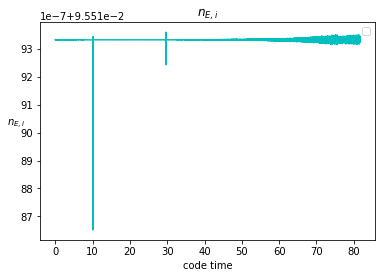

In [167]:
plt.plot(time[1:], n_ex[1:], 'c-', alpha = 1)
#plt.plot(timearrayN.T[0][2:], n_ey[1:], 'b-', label = r'$n_{Ey}$', alpha = 0.5)
#plt.plot(timearrayT[1:], posydif, 'b-', label = r'$\Delta y$', alpha = 0.8)

#plt.plot(timeave, dynstave.T[1], 'b-', label = r'$star$', alpha = 0.8)
#plt.plot(time[1:], n_e.T[2], 'g-', label = r'$n_{ez}$', alpha = 0.8)
#plt.xlim(0,30)
#plt.ylim(0.0955,0.09555)
plt.xlabel('code time')
plt.ylabel(r'$n_{E,i}$',rotation=0)

plt.title(r'$n_{E,i}$ ')
plt.legend()
#plt.savefig('ne-evolution-circular-0.001-4rs-5orbits.eps', bbox_inches='tight')#, dpi=300

plt.show()

No handles with labels found to put in legend.


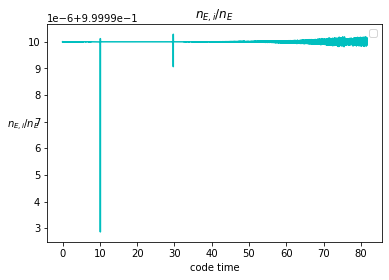

In [168]:
plt.plot(time[1:], n_ex[1:]/star.ntide, 'c-', alpha = 1)
#plt.plot(timearrayN.T[0][2:], n_ey[1:], 'b-', label = r'$n_{Ey}$', alpha = 0.5)
#plt.plot(timearrayT[1:], posydif, 'b-', label = r'$\Delta y$', alpha = 0.8)

#plt.plot(timeave, dynstave.T[1], 'b-', label = r'$star$', alpha = 0.8)
#plt.plot(time[1:], n_e.T[2], 'g-', label = r'$n_{ez}$', alpha = 0.8)
#plt.xlim(0,30)
#plt.ylim(0.0955,0.09555)
plt.xlabel('code time')
plt.ylabel(r'$n_{E,i}/n_E$',rotation=0)

plt.title(r'$n_{E,i} / n_E$ ')
plt.legend()
#plt.savefig('ne-evolution-circular-0.001-4rs-5orbits.eps', bbox_inches='tight')#, dpi=300

plt.show()

In [169]:
star.ntide

0.09551933333333332

# Comparison of results 

## Compare positions 

In [171]:
print(outcu['xstarglobal'])

[[-3.99233130e+01 -9.14758020e+01 -1.00251257e-14]
 [-3.99155618e+01 -9.14707274e+01 -1.01070523e-11]
 [-3.99078104e+01 -9.14656526e+01 -2.00332688e-11]
 ...
 [-1.71219055e+02  1.55205211e+02  1.32169722e-07]
 [-1.71223288e+02  1.55206844e+02  1.32213902e-07]
 [-1.71227517e+02  1.55208475e+02  1.32258171e-07]]


In [170]:
print(r[1].T)

[[-3.99233130e+01 -9.14758020e+01 -1.00251257e-14]
 [-3.99155557e+01 -9.14707235e+01 -1.00251256e-14]
 [-3.99077984e+01 -9.14656447e+01 -1.00251256e-14]
 ...
 [-1.71492507e+02  1.55138314e+02  4.09773064e-14]
 [-1.71496736e+02  1.55139941e+02  4.09779802e-14]
 [-1.71500972e+02  1.55141570e+02  4.09786550e-14]]


## Compare velocities 

In [172]:
print(outcu['vstarglobal'])

[[ 3.74078280e+00  2.44891719e+00  0.00000000e+00]
 [ 3.74086581e+00  2.44910739e+00 -2.20910297e-14]
 [ 3.74094881e+00  2.44929763e+00 -2.27716122e-14]
 ...
 [-2.74144334e+00  1.05750110e+00  3.00116080e-11]
 [-2.74142196e+00  1.05748173e+00  2.99906697e-11]
 [-2.74140061e+00  1.05746238e+00  2.99698694e-11]]


In [173]:
print(v[1].T)

[[ 3.74078280e+00  2.44891719e+00  0.00000000e+00]
 [ 3.74086590e+00  2.44910762e+00  2.08488227e-20]
 [ 3.74094901e+00  2.44929807e+00  4.17022976e-20]
 ...
 [-2.74084138e+00  1.05419927e+00  4.36610277e-16]
 [-2.74082002e+00  1.05417995e+00  4.36605172e-16]
 [-2.74079863e+00  1.05416060e+00  4.36600061e-16]]


## Compare accelerations 

In [174]:
print(outcu['astarglobal'])

[[ 4.00270367e-02  9.17134628e-02 -5.77151876e-16]
 [ 4.00285907e-02  9.17297451e-02 -2.00367403e-16]
 [ 4.00301439e-02  9.17460316e-02 -1.05807061e-17]
 ...
 [ 1.38287735e-02 -1.25369203e-02 -4.94152909e-16]
 [ 1.38283554e-02 -1.25363632e-02 -4.93037386e-16]
 [ 1.38279378e-02 -1.25358068e-02 -4.90300101e-16]]


In [175]:
print(aT[1].T)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.00751892e-02  9.18365405e-02  1.00551637e-17]
 [ 4.00767454e-02  9.18528585e-02  1.00575088e-17]
 ...
 [ 1.38394693e-02 -1.25196845e-02 -3.30768272e-18]
 [ 1.38390516e-02 -1.25191292e-02 -3.30755568e-18]
 [ 1.38386333e-02 -1.25185730e-02 -3.30742845e-18]]
